# PROYEK AKHIR *'DATA SCIENTIST'* 

Singgih Dwianto # ds-idn-02

# Daftar Isi

1. Deskripsi Proyek
2. Deskripsi Data
3. Instruksi Proyek : 

  3.1 Eksplorasi Data:
   - 3.1.1 Buka datasets
   - 3.1.2 Cek dan analisa feature dataset
     - contract Dataset
     - personal Dataset
     - internet Dataset
     - phone Dataset

  3.2 Data pre-processing
   - 3.2.1 Contract Dataset
   - 3.2.2 Personal Dataset
   - 3.2.3 Phone Dataset
   - 3.2.4 Internet Dataset
   - 3.2.5 Joining Dataset

  3.3 Pelatihan model untuk prediksi tingkat churn klien
   - 3.3.1 Sanity Check
   - 3.3.2 Splitting dataset
   - 3.3.3 Regresi Logistik
     - 3.3.3.1 Regresi Logistik dengan class_weight adjustment
     - 3.3.3.2 Regresi Logistik dengan upsampling data
     - 3.3.3.2 Regresi Logistik dengan downsampling data
   - 3.3.4 Decission Tree
     - 3.3.4.1 Decission Tree dengan class_weight adjustment
     - 3.3.4.2 Decission Tree dengan upsampling data
     - 3.3.4.2 Decission Tree dengan downsampling data
   - 3.3.5 Random Forrest
     - 3.3.5.1 Random Forrest dengan class_weight adjustment
     - 3.3.5.2 Random Forrest dengan upsampling data
     - 3.3.5.2 Random Forrest dengan downsampling data
   - 3.3.6 LGBM
     - 3.3.6.1 LGBM dengan class_weigh adjustment
     - 3.3.6.2 LGBM dengan upsampling data
     - 3.3.6.3 LGBM dengan downsampling data
   - 3.3.7 XGBoost
     - 3.3.7.1 XGBoost dengan class_weigh adjustment
     - 3.3.7.2 XGBoost dengan upsampling data
     - 3.3.7.3 XGBoost dengan downsampling data
  3.4 Analisis model
   - Fitting final model
   - Pengujian model pada data test
   
   
4. Laporan Tugas

## Deskripsi Proyek

Operator telekomunikasi bernama Interconnect ingin meramalkan tingkat *churn* klien mereka.󠀲󠀡󠀠󠀥󠀨󠀣󠀤󠀡󠀳󠀰 Jika diketahui bahwa seorang klien berencana untuk berhenti, klien tersebut akan ditawari kode promosi dan opsi paket khusus.󠀲󠀡󠀠󠀥󠀨󠀣󠀤󠀢󠀳󠀰 Tim pemasaran Interconnect telah mengumpulkan beberapa data pribadi klien, termasuk informasi tentang paket data yang dipilih dan kontrak mereka.

== > Layanan Interconnect

󠀰Interconnect menyediakan dua jenis layanan utama:

1. Jaringan telepon rumah.󠀲󠀡󠀠󠀥󠀨󠀣󠀤󠀦󠀳󠀰 Telepon bisa disambungkan ke beberapa saluran secara bersamaan.
2. Internet.󠀲󠀡󠀠󠀥󠀨󠀣󠀤󠀨󠀳󠀰 Jaringan internet dapat diatur melalui saluran telepon (DSL, *digital subscriber line*) atau melalui kabel serat optik.

󠀰Beberapa layanan lain yang disediakan Interconnect meliputi:

- Keamanan Internet: perangkat lunak antivirus (*DeviceProtection*) dan pemblokir situs web berbahaya (*OnlineSecurity*)
- Jalur dukungan teknis khusus (*TechSupport*)
- Penyimpanan *cloud* untuk *file* dan *backup* data (*OnlineBackup*)
- *Streaming* TV (*StreamingTV*) dan direktori film (*StreamingMovies*)

Klien dapat memilih untuk melakukan pembayaran secara bulanan atau menandatangani kontrak untuk berlangganan selama 1 atau 2 tahun.󠀲󠀡󠀠󠀥󠀨󠀣󠀥󠀥󠀳󠀰 Mereka bisa menggunakan beragam metode pembayaran dan menerima tagihan elektronik setelah melakukan transaksi.

## Deskripsi Data

󠀰Data yang tersedia terdiri dari beberapa *file* yang didapat dari sumber berbeda:

- `contract.csv` — 󠀰informasi kontrak
- `personal.csv` — 󠀰data personal klien
- `internet.csv` — informasi tentang layanan Internet
- `phone.csv` — informasi tentang layanan telepon

Pada setiap *file*, Anda bisa menemukan kolom `customerID` dengan kode unik yang ditetapkan untuk setiap klien.

Informasi kontrak berlaku per tanggal 1 Februari 2020.

## Instruksi Proyek
### Eksplorasi Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from xgboost import XGBClassifier
from scipy.stats import chi2_contingency,ttest_ind

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle


import warnings
warnings.filterwarnings ('ignore')

#### Buka Dataset

In [2]:
#panggil dataset
df_personal = pd.read_csv('personal.csv')
df_phone = pd.read_csv('phone.csv')
df_contract = pd.read_csv('contract.csv')
df_internet = pd.read_csv('internet.csv')

#### Cek dan Analisa feature dataset

##### dataset contract

In [3]:
# Cek contract dataset 
df_contract.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95


In [4]:
#info dataset contract
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [5]:
#cek data kosong di dataset contract
df_contract.isnull().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [6]:
#cek deskripsi dataset contract
df_contract.describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [7]:
#cek duplikasi dataset contrat
df_contract.duplicated().sum()

0

Temuan :
- tidak ada data yang duplicate
- tidak ditemukan null value
- ada tipe data yang aneh pada kolom MonthlyCharge yaitu menggunakan object, seharusnya float
    --> dirubah dulu dari string ke float dengan menghilangkan spasi

In [8]:
#handling spasi/character pada kolom TotalCharges dan diisi dengan nan dan dirubah menjadi tipe data float
df_contract['TotalCharges'] = df_contract['TotalCharges'].replace(r'^\s*$', np.nan, regex=True).astype(float)

In [9]:
#cek tipe data dari dataset
df_contract.dtypes

customerID           object
BeginDate            object
EndDate              object
Type                 object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

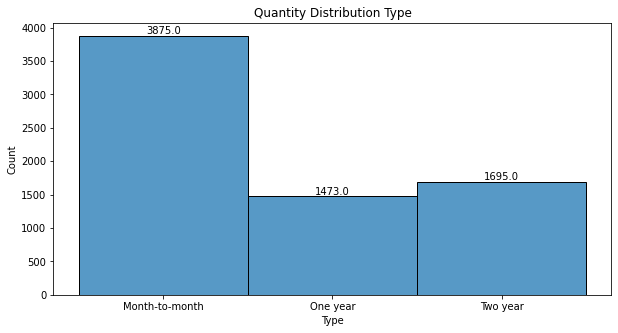

In [10]:
#cek pola histogram pada dataset df_contract kolom Type 
fig, ax = plt.subplots(figsize=(10, 5))
splot = sns.histplot(df_contract['Type']);

plt.title('Quantity Distribution Type')
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), rotation=0, 
                   textcoords = 'offset points')
plt.show()

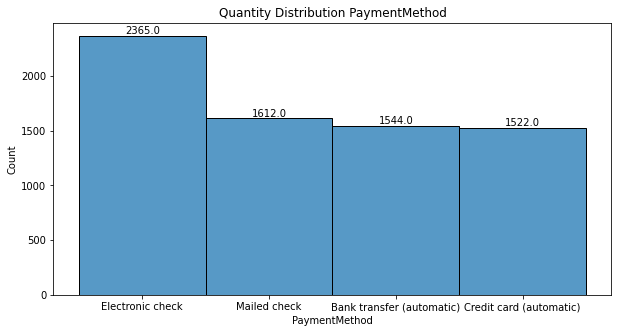

In [11]:
#cek pola histogram pada dataset df_contract kolom PaymentMethod 
plt.figure(figsize =(10,5))
splot = sns.histplot(df_contract['PaymentMethod']);
plt.title('Quantity Distribution PaymentMethod')
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), rotation=0, 
                   textcoords = 'offset points')
plt.show()

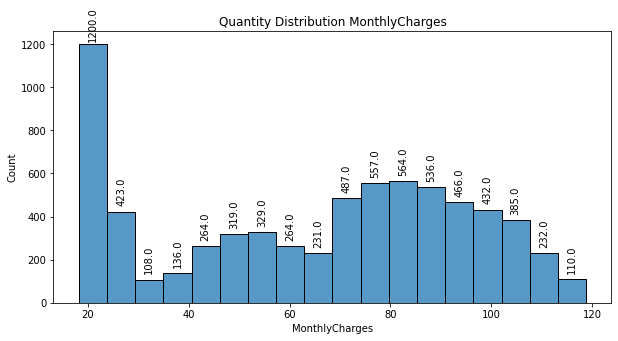

In [12]:
#cek pola histogram pada dataset df_contract kolom MonthlyCharges 
fig, ax = plt.subplots(figsize=(10, 5))
splot = sns.histplot(df_contract['MonthlyCharges']);
plt.title('Quantity Distribution MonthlyCharges')
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), rotation=90, 
                   textcoords = 'offset points')
plt.show()

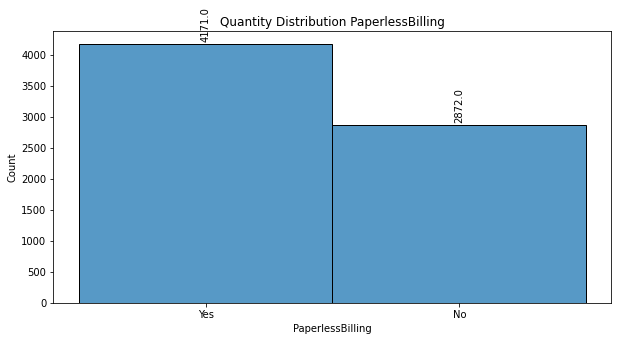

In [13]:
#cek pola histogram pada dataset df_contract kolom PaperlessBilling 
fig, ax = plt.subplots(figsize=(10, 5))
splot = sns.histplot(df_contract['PaperlessBilling']);
plt.title('Quantity Distribution PaperlessBilling')
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), rotation=90, 
                   textcoords = 'offset points')
plt.show()

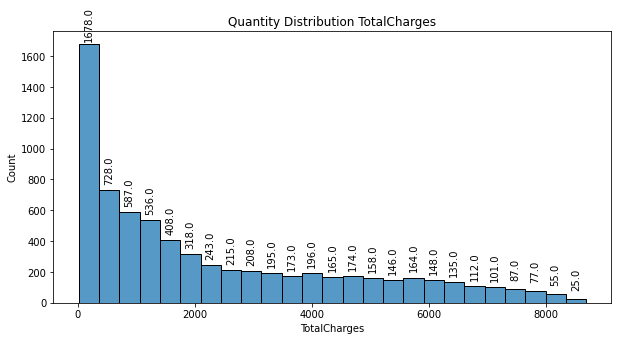

In [14]:
#cek pola histogram pada dataset df_contract kolom TotalCharges 
fig, ax = plt.subplots(figsize=(10, 5))
splot = sns.histplot(df_contract['TotalCharges']);
plt.title('Quantity Distribution TotalCharges')
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), rotation=90, 
                   textcoords = 'offset points')
plt.show()

In [15]:
2000/6

333.3333333333333

Finding :
- type pembayaran yang paling umum digunakan pelanggan adalah tipe paket bulanan, angkanya mendekati 2x lipat angka paket per tahun ataupun paket 2 tahun
- metode pembayaran yang paling banyak digunakan adalah tagihan elektronik, kemudian tagihan lewat email, baru kemudian transfer via bank dan yang terakhir adalah menggunakan pembayaran melalui kartu kredit
- PaperlessBilling lebih dominan dipilih oleh user
- jumlah pembayaran bulanan paling banyak didominasi pada nilai pembayaran terendah yaitu berkisar di angka 20an
- sedangkan total charge terbanyak yaitu 1679 user pada kisaran angka 0 sampai kisaran 300 kemudian makin mengecil ketika angka total charge mencapai angka 8000 an

##### dataset personal

In [16]:
# personal Dataset 
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [17]:
#info dataset personal
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [18]:
#cek data kosong di dataset personal
df_personal.isnull().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [19]:
#cek duplikasi dataset personal
df_personal.duplicated().sum()

0

In [20]:
#cek deskripsi dataset personal
df_personal.describe()

,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Finding :
- tidak ditemukan data yang hilang
- tidak ditemukan data yang duplicate

##### dataset phone

In [21]:
# phone Dataset 
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [22]:
#info dataset phone
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [23]:
#cek data kosong di dataset phone
df_phone.isnull().sum()

customerID       0
MultipleLines    0
dtype: int64

In [24]:
#cek duplikasi dataset phone
df_phone.duplicated().sum()

0

In [25]:
#cek deskripsi dataset phone
df_phone.describe()

,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,6416-YJTTB,No
freq,1,3390


Finding :
- tidak ditemukan data yang hilang
- tidak ditemukan data yang duplicate

##### dataset Internet

In [26]:
# internet Dataset 
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [27]:
#info dataset internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [28]:
#cek data kosong di dataset internet
df_internet.isnull().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [29]:
#cek duplikasi dataset internet
df_internet.duplicated().sum()

0

In [30]:
#cek deskripsi dataset internet
df_internet.describe()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,2737-WFVYW,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


Finding :
- tidak ditemukan data yang hilang
- tidak ditemukan data yang duplicate

### Data pre-processing

dari pengecekan dan analisa feature dataset ditemukan beberapa hal yang harus di tindaklanjuti untuk keperluan prediksi model, diantaranya sbb :
- pada dataset contract
    - masih adanya nan value pada kolom TotalCharges, selanjutnya akan diisi dengan nilai median
    - merubah tipe data object menjadi int ( 0 dan 1 )
        - Kolom EndDate --> No = 0 dan tanggal lainya = 1
        - kolom PaperlessBilling --> No = 0 dan Yes =1
- pada dataset personal
    - merubah tipe data object menjadi int ( 0 dan 1 )
        - Kolom gender --> Female = 0 dan Male = 1
        - kolom Partner --> No = 0 dan Yes =1
        - kolom Dependents  --> No = 0 dan Yes =1  
- pada dataset phone
    - merubah tipe data object menjadi int ( 0 dan 1 )
        - kolom MultipleLines --> No = 0 dan Yes =1    
- pada dataset internet
    - merubah tipe data object menjadi int ( 0 dan 1 )
        - kolom InternetService --> DSL = 0 dan Fiber optic =1 
        - kolom OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV, StreamingMovies --> No = 0 dan Yes =1        
- lakukan joining dataset
    - nilai nan value diisi dengan nilai modus masing masing kolom, karena merupakan data kategorik

#### Dataset contract

In [31]:
#cek missing value
df_contract.isnull().sum()

customerID           0
BeginDate            0
EndDate              0
Type                 0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64

In [32]:
#isi missing value dengan nilai median pada kolom TotalCharges
df_contract['TotalCharges'] = df_contract['TotalCharges'].fillna(df_contract['TotalCharges'].median()).astype(float)

In [33]:
#cek kolom enddate
df_contract['EndDate'].value_counts()

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: EndDate, dtype: int64

In [34]:
#fungi untuk merubah Yes dan No menjadi integer 0 dan 1
def convert_yesno(value):
    if (value) == 'No':
        value = 0  
    else:
        (value) = 1
    return value

In [35]:
#convert data Endate dan rubah tipe menjadi integer
df_contract['EndDate'] = df_contract['EndDate'].apply(convert_yesno).astype(int)

In [36]:
#cek kolom enddate
df_contract['EndDate'].value_counts()

0    5174
1    1869
Name: EndDate, dtype: int64

In [37]:
#convert data PaperlessBilling dan rubah tipe menjadi integer
df_contract['PaperlessBilling'] = df_contract['PaperlessBilling'].apply(convert_yesno).astype(int)

In [38]:
df_contract['PaperlessBilling'].value_counts()

1    4171
0    2872
Name: PaperlessBilling, dtype: int64

In [39]:
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,0,Month-to-month,1,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,0,One year,0,Mailed check,56.95,1889.50
2,3668-QPYBK,2019-10-01,1,Month-to-month,1,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,0,One year,0,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,1,Month-to-month,1,Electronic check,70.70,151.65


#### dataset personal

In [40]:
#cek dataset personal
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [41]:
#fungi untuk merubah gender
def convert_gender(value):
    if (value) == 'Female':
        value = 0  
    
    else:
        (value) = 1
    return value

In [42]:
#ubah gender menjadi nilai 0 dan 1 dan merubah tipe menjadi integer
df_personal['gender'] = df_personal['gender'].apply(convert_gender).astype(int)

In [43]:
#convert data Partner dan rubah tipe menjadi integer
df_personal['Partner'] = df_personal['Partner'].apply(convert_yesno).astype(int)

In [44]:
#convert data Dependents dan rubah tipe menjadi integer
df_personal['Dependents'] = df_personal['Dependents'].apply(convert_yesno).astype(int)

In [45]:
#cek dataset personal
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,0,0,1,0
1,5575-GNVDE,1,0,0,0
2,3668-QPYBK,1,0,0,0
3,7795-CFOCW,1,0,0,0
4,9237-HQITU,0,0,0,0


In [46]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   int64 
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   int64 
 4   Dependents     7043 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 275.2+ KB


#### Dataset Phone

In [47]:
#cek dataset phone
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [48]:
#convert data MultipleLines dan rubah tipe menjadi integer
df_phone['MultipleLines'] = df_phone['MultipleLines'].apply(convert_yesno).astype(int)

In [49]:
#cek dataset phone
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,0
1,3668-QPYBK,0
2,9237-HQITU,0
3,9305-CDSKC,1
4,1452-KIOVK,1


#### Dataset Internet

In [50]:
#cek dataset internet
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [51]:
#fungi untuk merubah internet service
def convert_iservis(value):
    if (value) == 'DSL':
        value = 0  
    
    else:
        (value) = 1
    return value

In [52]:
#ubah InternetService menjadi nilai 0 dan 1 dan merubah tipe menjadi integer
df_internet['InternetService'] = df_internet['InternetService'].apply(convert_iservis).astype(int)

In [53]:
#convert data OnlineSecurity dan rubah tipe menjadi integer
df_internet['OnlineSecurity'] = df_internet['OnlineSecurity'].apply(convert_yesno).astype(int)

In [54]:
#convert data OnlineBackup dan rubah tipe menjadi integer
df_internet['OnlineBackup'] = df_internet['OnlineBackup'].apply(convert_yesno).astype(int)

In [55]:
#convert data DeviceProtection dan rubah tipe menjadi integer
df_internet['DeviceProtection'] = df_internet['DeviceProtection'].apply(convert_yesno).astype(int)

In [56]:
#convert data TechSupport dan rubah tipe menjadi integer
df_internet['TechSupport'] = df_internet['TechSupport'].apply(convert_yesno).astype(int)

In [57]:
#convert data StreamingTV dan rubah tipe menjadi integer
df_internet['StreamingTV'] = df_internet['StreamingTV'].apply(convert_yesno).astype(int)

In [58]:
#convert data StreamingMovies dan rubah tipe menjadi integer
df_internet['StreamingMovies'] = df_internet['StreamingMovies'].apply(convert_yesno).astype(int)

In [59]:
#cek dataset internet
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,0,0,1,0,0,0,0
1,5575-GNVDE,0,1,0,1,0,0,0
2,3668-QPYBK,0,1,1,0,0,0,0
3,7795-CFOCW,0,1,0,1,1,0,0
4,9237-HQITU,1,0,0,0,0,0,0


#### Joining dataset

In [60]:
#penggabungan dataset contract dan phone
df_cp = pd.merge(df_contract, df_phone, on =['customerID'], how ='outer')

In [61]:
#penggabungan dataset cp dan personal
df_cpp = pd.merge(df_cp, df_personal, on =['customerID'], how ='outer')

In [62]:
#penggabungan dataset cpp dan internet
df_all = pd.merge(df_cpp, df_internet, on =['customerID'], how ='outer')

In [63]:
#cek null value di dataset yang telah di gabung
df_all.isnull().sum()

customerID             0
BeginDate              0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
MultipleLines        682
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
dtype: int64

In [64]:
#isi missing value dengan nilai modus pada kolom TotalCharges
df_all['MultipleLines'] = df_all['MultipleLines'].fillna(df_all['MultipleLines'].mode()[0]).astype(int)

In [65]:
#isi missing value dengan nilai modus pada kolom InternetService
df_all['InternetService'] = df_all['InternetService'].fillna(df_all['InternetService'].mode()[0]).astype(int)

In [66]:
#isi missing value dengan nilai modus pada kolom OnlineSecurity
df_all['OnlineSecurity'] = df_all['OnlineSecurity'].fillna(df_all['OnlineSecurity'].mode()[0]).astype(int)

In [67]:
#isi missing value dengan nilai modus pada kolom OnlineBackup
df_all['OnlineBackup'] = df_all['OnlineBackup'].fillna(df_all['OnlineBackup'].mode()[0]).astype(int)

In [68]:
#isi missing value dengan nilai modus pada kolom DeviceProtection
df_all['DeviceProtection'] = df_all['DeviceProtection'].fillna(df_all['DeviceProtection'].mode()[0]).astype(int)

In [69]:
#isi missing value dengan nilai modus pada kolom TechSupport
df_all['TechSupport'] = df_all['TechSupport'].fillna(df_all['TechSupport'].mode()[0]).astype(int)

In [70]:
#isi missing value dengan nilai modus pada kolom StreamingTV
df_all['StreamingTV'] = df_all['StreamingTV'].fillna(df_all['StreamingTV'].mode()[0]).astype(int)

In [71]:
#isi missing value dengan nilai modus pada kolom StreamingMovies
df_all['StreamingMovies'] = df_all['StreamingMovies'].fillna(df_all['StreamingMovies'].mode()[0]).astype(int)

In [72]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   int64  
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   int64  
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   float64
 8   MultipleLines     7043 non-null   int64  
 9   gender            7043 non-null   int64  
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   int64  
 12  Dependents        7043 non-null   int64  
 13  InternetService   7043 non-null   int64  
 14  OnlineSecurity    7043 non-null   int64  
 15  OnlineBackup      7043 non-null   int64  
 16  DeviceProtection  7043 non-null   int64  


In [73]:
#cek dataset keseluruhan
df_all.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,2020-01-01,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,0,1,0,0,0,1,0,0,0,0
1,5575-GNVDE,2017-04-01,0,One year,0,Mailed check,56.95,1889.50,0,1,0,0,0,0,1,0,1,0,0,0
2,3668-QPYBK,2019-10-01,1,Month-to-month,1,Mailed check,53.85,108.15,0,1,0,0,0,0,1,1,0,0,0,0
3,7795-CFOCW,2016-05-01,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0,0,1,0,1,1,0,0
4,9237-HQITU,2019-09-01,1,Month-to-month,1,Electronic check,70.70,151.65,0,0,0,0,0,1,0,0,0,0,0,0


In [74]:
df_all = df_all.drop(['customerID','BeginDate'], axis=1)

In [75]:
df_all.head()

,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,0,1,0,0,0,1,0,0,0,0
1,0,One year,0,Mailed check,56.95,1889.50,0,1,0,0,0,0,1,0,1,0,0,0
2,1,Month-to-month,1,Mailed check,53.85,108.15,0,1,0,0,0,0,1,1,0,0,0,0
3,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0,0,1,0,1,1,0,0
4,1,Month-to-month,1,Electronic check,70.70,151.65,0,0,0,0,0,1,0,0,0,0,0,0


In [76]:
#encoding dataset contract
categorical_features = [
    'Type',
    'PaperlessBilling',
    'PaymentMethod',
]

In [77]:
#menghitung jumlah kolom baru hasil encoding data categorical
for feature in categorical_features :
    print(f'features {feature} {len(df_all[feature].value_counts())}')

features Type 3
features PaperlessBilling 2
features PaymentMethod 4


In [78]:
df_ohe = pd.get_dummies(df_all)

In [79]:
df_ohe.shape

(7043, 23)

In [80]:
df_ohe.head()

,EndDate,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines,gender,SeniorCitizen,Partner,Dependents,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Type_Month-to-month,Type_One year,Type_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,56.95,1889.50,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,1,53.85,108.15,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,42.30,1840.75,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,1,1,70.70,151.65,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


Rencana selanjutnya :
- melakukan pelatihan model untuk prediksi tingkat churn klien
    - regresi linear
    - Decission Tree
    - Random Forrest
    - LGBM
- melakukan analisis model

### Pelatihan model untuk prediksi tingkat churn klien

#### Sanity Check

In [81]:
#checking EndDate column
df_ohe['EndDate'].value_counts()

0    5174
1    1869
Name: EndDate, dtype: int64

In [82]:
# percentage (%) of EndDate data
df_ohe['EndDate'].value_counts()/df_ohe.shape[0]*100

0    73.463013
1    26.536987
Name: EndDate, dtype: float64

Catatan :
- proporsi dataset adalah 'imbalance' dengan nilai 0 dominan sebesar 73,4 %
- unbalance dataset akan menghasilkan model yang kurang sesuai
- skor akurasi data akan rendah

#### Splitting dataset

In [83]:
#separate it in to the training set, validation set, and test set

train_valid, test = train_test_split(df_ohe, test_size = 0.2)
train, valid = train_test_split(train_valid, test_size = 0.25)

#train
features_train = train.drop(['EndDate'], axis=1)
target_train = train['EndDate']

#validation
features_valid = valid.drop(['EndDate'], axis=1)
target_valid = valid['EndDate']

#test
features_test = test.drop(['EndDate'], axis=1)
target_test = test['EndDate']

#check features shape
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(4225, 22)
(1409, 22)
(1409, 22)


In [84]:
#check dataset shape
df_ohe.shape

(7043, 23)

In [85]:
#cek jumlah shape hasil splitting
4225+1409+1409

7043

In [86]:
#check features_train dataset
features_train.head()

,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Type_Month-to-month,Type_One year,Type_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3213,0,35.40,1412.40,0,0,0,1,1,0,1,...,0,0,0,0,1,0,0,1,0,0
5056,0,84.70,5893.90,1,0,0,1,1,0,1,...,1,1,1,0,0,1,0,1,0,0
2099,1,78.85,3126.85,1,0,0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,0
5970,1,89.15,413.25,1,1,0,1,0,1,1,...,0,0,1,1,0,0,0,0,1,0
580,0,19.00,233.55,0,0,0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,1


In [87]:
#check features_valid dataset
features_valid.head()

,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Type_Month-to-month,Type_One year,Type_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1809,1,85.00,2642.05,1,1,1,1,0,1,0,...,0,0,1,1,0,0,0,0,1,0
229,1,85.30,4107.25,1,0,0,1,1,0,1,...,1,1,1,0,0,1,0,1,0,0
2913,0,63.90,3334.95,0,1,0,0,0,0,1,...,1,1,1,0,0,1,0,1,0,0
6999,1,35.45,106.85,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
179,1,20.55,1252.00,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0


In [88]:
#check features_test dataset
features_test.head()

,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Type_Month-to-month,Type_One year,Type_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1332,0,23.95,1713.10,1,1,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3226,0,20.75,141.10,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4043,1,64.05,3886.85,0,1,1,1,0,0,1,...,1,1,1,0,0,1,0,1,0,0
5203,0,70.70,225.65,0,1,0,0,1,0,0,...,1,1,1,1,0,0,0,0,0,1
854,0,20.50,1424.90,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0


In [89]:
# define upsampling method
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat )
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=8080)

    return features_upsampled, target_upsampled
features_upsampled, target_upsampled = upsample(features_train, target_train, 3)

In [90]:
#counting the target_train data
target_train.value_counts()

0    3069
1    1156
Name: EndDate, dtype: int64

In [91]:
#counting the target_upsampled data
target_upsampled.value_counts()

1    3468
0    3069
Name: EndDate, dtype: int64

In [92]:
#define downsampling method

def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=8080)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=8080)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=8080)

    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.3)


In [93]:
#counting the target_train data
target_train.value_counts()

0    3069
1    1156
Name: EndDate, dtype: int64

In [94]:
#counting the target_downsampled data
target_downsampled.value_counts()

1    1156
0     921
Name: EndDate, dtype: int64

#### Regresi Logistik

In [95]:
#Logistic Regression without hyperparameter tunning

log_reg = LogisticRegression()
log_reg.fit(features_train, target_train)

prediction_train = log_reg.predict(features_train)
prediction_valid = log_reg.predict(features_valid)
probabilities_valid = log_reg.predict_proba(features_valid)[:,1]

print('Logistic Regression without hyperparameter tunning')
print ('  Training accuracy score   : ',accuracy_score (target_train, prediction_train)*100)
print ('  Validation accuracy score : ',accuracy_score (target_valid, prediction_valid)*100)
print (' ')

print('  Train F1 score :', f1_score(target_train, prediction_train))
print('  Valid F1 score :', f1_score(target_valid, prediction_valid))
print('  AUC-ROC score  :', roc_auc_score(target_valid, probabilities_valid))



Logistic Regression without hyperparameter tunning
  Training accuracy score   :  78.74556213017752
  Validation accuracy score :  80.1277501774308
 
  Train F1 score : 0.5707456978967496
  Valid F1 score : 0.5541401273885351
  AUC-ROC score  : 0.8335762006328118


##### Regresi Logistik dengan class_weight adjustment

In [96]:
#Logistic Regression with class_weight adjustment tunning

log_reg = LogisticRegression(random_state=8080, class_weight = 'balanced')
log_reg.fit(features_train, target_train)

prediction_train = log_reg.predict(features_train)
prediction_valid = log_reg.predict(features_valid)
probabilities_valid = log_reg.predict_proba(features_valid)[:,1]

print('Logistic Regression with class_weight adjustment tunning')
print ('  Training accuracy score   : ',accuracy_score (target_train, prediction_train)*100)
print ('  Validation accuracy score : ',accuracy_score (target_valid, prediction_valid)*100)
print (' ')

print('  Train F1 score :', f1_score(target_train, prediction_train))
print('  Valid F1 score :', f1_score(target_valid, prediction_valid))
print('  AUC-ROC score  :', roc_auc_score(target_valid, probabilities_valid))

Logistic Regression with class_weight adjustment tunning
  Training accuracy score   :  74.03550295857988
  Validation accuracy score :  74.09510290986515
 
  Train F1 score : 0.6215936529837875
  Valid F1 score : 0.5966850828729282
  AUC-ROC score  : 0.8309331531502196


##### Regresi Logistik dengan upsampling data

In [97]:
#LogisticRegression Regression with upsampling data

logreg = LogisticRegression(random_state=8080)
logreg.fit(features_upsampled, target_upsampled)

prediction_train = logreg.predict(features_train)
prediction_valid = logreg.predict(features_valid)
probabilities_valid = logreg.predict_proba(features_valid)[:,1]

print('LogisticRegression with upsampling data')
print ('  Training accuracy score   : ',accuracy_score (target_train, prediction_train)*100)
print ('  Validation accuracy score : ',accuracy_score (target_valid, prediction_valid)*100)
print(' ')
print('  Train F1 score :', f1_score(target_train, prediction_train))
print('  Valid F1 score :', f1_score(target_valid, prediction_valid))
print('  AUC-ROC score  :', roc_auc_score(target_valid, probabilities_valid))



LogisticRegression with upsampling data
  Training accuracy score   :  72.73372781065089
  Validation accuracy score :  72.39176721078779
 
  Train F1 score : 0.6205533596837945
  Valid F1 score : 0.5926701570680628
  AUC-ROC score  : 0.8345042522129417


##### Regresi Logistik dengan downsampling data

In [98]:
#LogisticRegression Regression with downsampling data

logreg = LogisticRegression(random_state=8080)
logreg.fit(features_downsampled, target_downsampled)

prediction_train = logreg.predict(features_train)
prediction_valid = logreg.predict(features_valid)
probabilities_valid = logreg.predict_proba(features_valid)[:,1]

print('LogisticRegression with downsampling data')
print('  Training accuracy score   : ',accuracy_score (target_train, prediction_train)*100)
print('  Validation accuracy score : ',accuracy_score (target_valid, prediction_valid)*100)
print(' ')
print('  Train F1 score :', f1_score(target_train, prediction_train))
print('  Valid F1 score :', f1_score(target_valid, prediction_valid))
print('  AUC-ROC score  :', roc_auc_score(target_valid, probabilities_valid))

LogisticRegression with downsampling data
  Training accuracy score   :  71.6923076923077
  Validation accuracy score :  70.9013484740951
 
  Train F1 score : 0.6131953428201812
  Valid F1 score : 0.5799180327868853
  AUC-ROC score  : 0.8293565509044432


#### Decission Tree

In [99]:
#Decission Tree Regression without hyperparameter tunning

dtree = DecisionTreeClassifier()
dtree.fit(features_train, target_train)

y_prediction_valid = dtree.predict(features_valid)
y_prediction_test = dtree.predict(features_test)

print('DecissionTree Regression without hyperparameter tunning')
print ('validation accuracy score : ',accuracy_score (target_valid, y_prediction_valid)*100)
print ('testing accuracy score    : ',accuracy_score (target_test, y_prediction_test)*100)

DecissionTree Regression without hyperparameter tunning
validation accuracy score :  73.95315826827537
testing accuracy score    :  75.1596877217885


##### Decission Tree dengan class_weight adjustment

In [100]:
#Decission Tree Regression with class_weight adjustment tunning

max_dept_list = [1,2,4,6,8,10, None]
for md in max_dept_list:
    dtree = DecisionTreeClassifier(max_depth=md,random_state=8080, class_weight = 'balanced')
    dtree.fit(features_train, target_train)

    prediction_valid = dtree.predict(features_valid)
    prediction_train = dtree.predict(features_train)
    probabilities_valid = dtree.predict_proba(features_valid)[:,1]
    
    acc_train = accuracy_score (target_train, prediction_train)*100
    acc_valid = accuracy_score (target_valid, prediction_valid)*100

    print(f'for max depth {md} ')
    print(f'  training accuration value is  : {acc_train}')
    print(f'  validation accuration value is: {acc_valid} ')
    print('')
    print('   Train F1 score :', f1_score(target_train, prediction_train))
    print('   Valid F1 score :', f1_score(target_valid, prediction_valid))
    print('   AUC-ROC  :', roc_auc_score(target_valid, probabilities_valid))
    print('---------------------------------------------------')
 #   print('')

for max depth 1 
  training accuration value is  : 64.97041420118343
  validation accuration value is: 65.36550745209368 

   Train F1 score : 0.5795454545454546
   Valid F1 score : 0.5571687840290381
   AUC-ROC  : 0.7314403251979572
---------------------------------------------------
for max depth 2 
  training accuration value is  : 64.97041420118343
  validation accuration value is: 65.36550745209368 

   Train F1 score : 0.5795454545454546
   Valid F1 score : 0.5571687840290381
   AUC-ROC  : 0.7882454940653543
---------------------------------------------------
for max depth 4 
  training accuration value is  : 77.39644970414201
  validation accuration value is: 76.86302342086586 

   Train F1 score : 0.6325509811465949
   Valid F1 score : 0.5894206549118387
   AUC-ROC  : 0.8188589850046403
---------------------------------------------------
for max depth 6 
  training accuration value is  : 77.53846153846153
  validation accuration value is: 75.2306600425834 

   Train F1 score : 

In [101]:
#hyperparameters tunning
best_max_depth = 4
dtree = DecisionTreeClassifier(max_depth=best_max_depth)
dtree.fit(features_train, target_train)

y_prediction_train_2 = dtree.predict(features_train)
y_prediction_valid_2 = dtree.predict(features_valid)
y_prediction_test_2 = dtree.predict(features_test)

print(accuracy_score (target_train, y_prediction_train_2)*100)
print(accuracy_score (target_valid, y_prediction_valid_2)*100)
print(accuracy_score (target_test, y_prediction_test_2)*100)

78.62721893491124
80.1277501774308
79.70191625266146


##### Decission Tree dengan upsampling data

In [102]:
#Decission Tree Regression with upsampling data

for depth in [1,2,4,6,8,10, None]:
    dtree = DecisionTreeClassifier(random_state = 8080, max_depth = depth)
    dtree.fit(features_upsampled, target_upsampled)

    prediction_valid = dtree.predict(features_valid)
    prediction_train = dtree.predict(features_train)
    probabilities_valid = dtree.predict_proba(features_valid)[:,1] 
    
    acc_train = accuracy_score (target_train, prediction_train)*100
    acc_valid = accuracy_score (target_valid, prediction_valid)*100

    print(f'for max depth {depth} ')
    print(f'  training accuration value is  : {acc_train}')
    print(f'  validation accuration value is: {acc_valid} ')
    print('')
    print('   Train F1 score :', f1_score(target_train, prediction_train))
    print('   Valid F1 score :', f1_score(target_valid, prediction_valid))
    print('   AUC-ROC  :', roc_auc_score(target_valid, probabilities_valid))
    print('----------------------------------------------------')
  #  print('')

for max depth 1 
  training accuration value is  : 64.97041420118343
  validation accuration value is: 65.36550745209368 

   Train F1 score : 0.5795454545454546
   Valid F1 score : 0.5571687840290381
   AUC-ROC  : 0.7314403251979572
----------------------------------------------------
for max depth 2 
  training accuration value is  : 64.97041420118343
  validation accuration value is: 65.36550745209368 

   Train F1 score : 0.5795454545454546
   Valid F1 score : 0.5571687840290381
   AUC-ROC  : 0.7882454940653543
----------------------------------------------------
for max depth 4 
  training accuration value is  : 75.10059171597632
  validation accuration value is: 73.10149041873669 

   Train F1 score : 0.6242857142857142
   Valid F1 score : 0.5668571428571428
   AUC-ROC  : 0.8190380826779986
----------------------------------------------------
for max depth 6 
  training accuration value is  : 72.66272189349112
  validation accuration value is: 68.70120652945351 

   Train F1 scor

##### Decission Tree dengan Downsampling data

In [103]:
#Decission Tree Regression with downsampling data
print ('Decission Tree Regression with downsampling data')
print ('')
for depth in [1,2,4,6,8,10, None]:
    dtree = DecisionTreeClassifier(random_state = 8080, max_depth = depth)
    dtree.fit(features_downsampled, target_downsampled)

    prediction_valid = dtree.predict(features_valid)
    prediction_train = dtree.predict(features_train)
    probabilities_valid = dtree.predict_proba(features_valid)[:,1]

    acc_train = accuracy_score (target_train, prediction_train)*100
    acc_valid = accuracy_score (target_valid, prediction_valid)*100

    print(f'for max depth {depth} ')
    print(f'  training accuration value is  : {acc_train}')
    print(f'  validation accuration value is: {acc_valid} ')
    print('')
    print('   Train F1 score :', f1_score(target_train, prediction_train))
    print('   Valid F1 score :', f1_score(target_valid, prediction_valid))
    print('   AUC-ROC  :', roc_auc_score(target_valid, probabilities_valid))
    print('----------------------------------------------------')

Decission Tree Regression with downsampling data

for max depth 1 
  training accuration value is  : 64.97041420118343
  validation accuration value is: 65.36550745209368 

   Train F1 score : 0.5795454545454546
   Valid F1 score : 0.5571687840290381
   AUC-ROC  : 0.7314403251979572
----------------------------------------------------
for max depth 2 
  training accuration value is  : 64.97041420118343
  validation accuration value is: 65.36550745209368 

   Train F1 score : 0.5795454545454546
   Valid F1 score : 0.5571687840290381
   AUC-ROC  : 0.7853297296710573
----------------------------------------------------
for max depth 4 
  training accuration value is  : 72.09467455621302
  validation accuration value is: 70.68843151171043 

   Train F1 score : 0.6178282009724473
   Valid F1 score : 0.572020725388601
   AUC-ROC  : 0.8211845411571881
----------------------------------------------------
for max depth 6 
  training accuration value is  : 73.32544378698225
  validation accurati

#### Random Forest

In [104]:
#RandomForest without hyperparameter tunning
rf = RandomForestClassifier()
rf.fit(features_train, target_train)

y_prediction_valid_3 = rf.predict(features_valid)
y_prediction_test_3 = rf.predict(features_test)

print('RandomForest without hyperparameter tunning')
print ('validation accuracy score : ',accuracy_score (target_valid, y_prediction_valid_3)*100)
print ('testing accuracy score    : ',accuracy_score (target_test, y_prediction_test_3)*100)

RandomForest without hyperparameter tunning
validation accuracy score :  78.708303761533
testing accuracy score    :  81.90205819730305


##### Random Forest dengan class_weight adjustment

In [105]:
#RandomForest with balance class_weight

for estim in range ( 10, 101, 10):
    rf = RandomForestClassifier(random_state = 8080, n_estimators = estim, class_weight = 'balanced' )

    rf.fit(features_train, target_train)
    prediction_valid = rf.predict(features_valid)
    prediction_train = rf.predict(features_train)
    probabilities_valid = rf.predict_proba(features_valid)[:,1]

    acc_train = accuracy_score (target_train, prediction_train)*100
    acc_valid = accuracy_score (target_valid, prediction_valid)*100
    
    print('n_estimators =', estim)
    print(f'  training accuration value is  : {acc_train}')
    print(f'  validation accuration value is: {acc_valid}')
    print('')
    print('    Train F1 score :', f1_score(target_train, prediction_train))
    print('    Valid F1 score :', f1_score(target_valid, prediction_valid))
    print('    AUC-ROC  :', roc_auc_score(target_valid, probabilities_valid))
    print('----------------------------------------------------')

n_estimators = 10
  training accuration value is  : 97.89349112426035
  validation accuration value is: 77.14691270404542

    Train F1 score : 0.9606368863334808
    Valid F1 score : 0.44673539518900346
    AUC-ROC  : 0.7728905821759825
----------------------------------------------------
n_estimators = 20
  training accuration value is  : 99.19526627218936
  validation accuration value is: 78.06955287437899

    Train F1 score : 0.9852173913043478
    Valid F1 score : 0.4699828473413379
    AUC-ROC  : 0.7969575104337963
----------------------------------------------------
n_estimators = 30
  training accuration value is  : 99.52662721893492
  validation accuration value is: 78.49538679914833

    Train F1 score : 0.9913419913419912
    Valid F1 score : 0.5008237232289952
    AUC-ROC  : 0.802344008640106
----------------------------------------------------
n_estimators = 40
  training accuration value is  : 99.66863905325444
  validation accuration value is: 78.42441447835344

    Tra

##### Randof Forest dengan upsampling data

In [106]:
#RandomForest with upsampling data

for estim in range ( 10, 101, 10):
    rf = RandomForestClassifier(random_state = 8080, n_estimators = estim)

    rf.fit(features_upsampled, target_upsampled)
    prediction_valid = rf.predict(features_valid)
    prediction_train = rf.predict(features_train)
    probabilities_valid = rf.predict_proba(features_valid)[:,1]
    
    acc_train = accuracy_score (target_train, prediction_train)*100
    acc_valid = accuracy_score (target_valid, prediction_valid)*100
    
    print('n_estimators =', estim)
    print(f'  training accuration value is  : {acc_train}')
    print(f'  validation accuration value is: {acc_valid}')
    print('')
    print('    Train F1 score :', f1_score(target_train, prediction_train))
    print('    Valid F1 score :', f1_score(target_valid, prediction_valid))
    print('    AUC-ROC  :', roc_auc_score(target_valid, probabilities_valid))
    print('----------------------------------------------------')

n_estimators = 10
  training accuration value is  : 99.38461538461539
  validation accuration value is: 76.43718949609652

    Train F1 score : 0.9888793840889649
    Valid F1 score : 0.5310734463276836
    AUC-ROC  : 0.7813217408293851
----------------------------------------------------
n_estimators = 20
  training accuration value is  : 99.71597633136095
  validation accuration value is: 76.08232789212207

    Train F1 score : 0.9948364888123925
    Valid F1 score : 0.5351724137931035
    AUC-ROC  : 0.791568298626375
----------------------------------------------------
n_estimators = 30
  training accuration value is  : 99.66863905325444
  validation accuration value is: 75.7984386089425

    Train F1 score : 0.9939810834049871
    Valid F1 score : 0.5270457697642162
    AUC-ROC  : 0.7887637918776491
----------------------------------------------------
n_estimators = 40
  training accuration value is  : 99.6923076923077
  validation accuration value is: 76.08232789212207

    Train 

##### Randof Forest dengan downsampling data

In [107]:
#RandomForest with downsampling data

for estim in range ( 10, 101, 10):
    rf = RandomForestClassifier(random_state = 8080, n_estimators = estim)

    rf.fit(features_downsampled, target_downsampled)
    prediction_valid = rf.predict(features_valid)
    prediction_train = rf.predict(features_train)
    probabilities_valid = rf.predict_proba(features_valid)[:,1]

    acc_train = accuracy_score (target_train, prediction_train)*100
    acc_valid = accuracy_score (target_valid, prediction_valid)*100
    
    print('n_estimators =', estim)
    print(f'  training accuration value is  : {acc_train}')
    print(f'  validation accuration value is: {acc_valid}')
    print('')
    print('    Train F1 score :', f1_score(target_train, prediction_train))
    print('    Valid F1 score :', f1_score(target_valid, prediction_valid))
    print('    AUC-ROC  :', roc_auc_score(target_valid, probabilities_valid))

    print('----------------------------------------------------')

n_estimators = 10
  training accuration value is  : 84.5680473372781
  validation accuration value is: 70.54648687012065

    Train F1 score : 0.7771701982228297
    Valid F1 score : 0.5636172450052576
    AUC-ROC  : 0.7886823838443044
----------------------------------------------------
n_estimators = 20
  training accuration value is  : 84.09467455621302
  validation accuration value is: 70.40454222853087

    Train F1 score : 0.7746478873239436
    Valid F1 score : 0.5723076923076923
    AUC-ROC  : 0.8047550432276658
----------------------------------------------------
n_estimators = 30
  training accuration value is  : 83.33727810650888
  validation accuration value is: 69.90773598296664

    Train F1 score : 0.7664233576642336
    Valid F1 score : 0.5742971887550201
    AUC-ROC  : 0.8078756845058802
----------------------------------------------------
n_estimators = 40
  training accuration value is  : 83.59763313609467
  validation accuration value is: 69.41092973740241

    Trai

#### LGBM

In [108]:
#LGBM without hyperparameter tunning
lgbm = lgb.LGBMClassifier()
lgbm.fit(features_train, target_train)

y_prediction_valid_3 = lgbm.predict(features_valid)
y_prediction_test_3 = lgbm.predict(features_test)
probabilities_valid = lgbm.predict_proba(features_valid)[:,1]

print('LGBM without hyperparameter tunning')
print ('validation accuracy score : ',accuracy_score (target_valid, y_prediction_valid_3)*100)
print ('testing accuracy score    : ',accuracy_score (target_test, y_prediction_test_3)*100)
print('AUC-ROC  :', roc_auc_score(target_test, probabilities_valid))

LGBM without hyperparameter tunning
validation accuracy score :  79.77288857345636
testing accuracy score    :  81.12136266855926
AUC-ROC  : 0.5202246043097621


##### LGBM dengan class_weigh adjustment

In [109]:
#LGBM with balance class_weight
for estim in range ( 10, 101, 10):
    lgbm = lgb.LGBMClassifier(boosting_type='dart', learning_rate=0.1,
                              n_estimators=estim, n_jobs=1, random_state=777,class_weight = 'balanced')

    lgbm.fit(features_train, target_train)
    prediction_valid = lgbm.predict(features_valid)
    prediction_train = lgbm.predict(features_train)
    probabilities_valid = lgbm.predict_proba(features_valid)[:,1]

    acc_train = accuracy_score (target_train, prediction_train)*100
    acc_valid = accuracy_score (target_valid, prediction_valid)*100
    
    print('n_estimators =', estim)
    print(f'  training accuration value is  : {acc_train}')
    print(f'  validation accuration value is: {acc_valid}')
    print('')
    print('    Train F1 score :', f1_score(target_train, prediction_train))
    print('    Valid F1 score :', f1_score(target_valid, prediction_valid))
    print('    AUC-ROC  :', roc_auc_score(target_valid, probabilities_valid))

    print('----------------------------------------------------')

n_estimators = 10
  training accuration value is  : 77.98816568047337
  validation accuration value is: 75.0887154009936

    Train F1 score : 0.6723044397463002
    Valid F1 score : 0.6104328523862376
    AUC-ROC  : 0.835350895759727
----------------------------------------------------
n_estimators = 20
  training accuration value is  : 78.72189349112426
  validation accuration value is: 74.59190915542938

    Train F1 score : 0.6831159675713783
    Valid F1 score : 0.6065934065934065
    AUC-ROC  : 0.8363671393759803
----------------------------------------------------
n_estimators = 30
  training accuration value is  : 79.31360946745562
  validation accuration value is: 75.44357700496806

    Train F1 score : 0.6935483870967741
    Valid F1 score : 0.6138392857142857
    AUC-ROC  : 0.8375651942667035
----------------------------------------------------
n_estimators = 40
  training accuration value is  : 79.83431952662721
  validation accuration value is: 74.4499645138396

    Train 

##### LGBM dengan downsampling data

In [110]:
for estim in range ( 10, 101, 10):
    lgbm = lgb.LGBMClassifier(boosting_type='dart', learning_rate=0.1,
                          max_depth=estim, n_estimators=estim, n_jobs=1, random_state=777)

    lgbm.fit(features_downsampled, target_downsampled)
    prediction_valid = lgbm.predict(features_valid)
    prediction_train = lgbm.predict(features_train)
    probabilities_valid = lgbm.predict_proba(features_valid)[:,1]

    acc_train = accuracy_score (target_train, prediction_train)*100
    acc_valid = accuracy_score (target_valid, prediction_valid)*100
    
    print('n_estimators =', estim)
    print(f'  training accuration value is  : {acc_train}')
    print(f'  validation accuration value is: {acc_valid}')
    print('')
    print('    Train F1 score :', f1_score(target_train, prediction_train))
    print('    Valid F1 score :', f1_score(target_valid, prediction_valid))
    print('    AUC-ROC  :', roc_auc_score(target_valid, probabilities_valid))

    print('----------------------------------------------------')

n_estimators = 10
  training accuration value is  : 71.71597633136095
  validation accuration value is: 68.27537260468416

    Train F1 score : 0.6330979428922321
    Valid F1 score : 0.5722488038277512
    AUC-ROC  : 0.8310742604080169
----------------------------------------------------
n_estimators = 20
  training accuration value is  : 73.23076923076923
  validation accuration value is: 70.04968062455642

    Train F1 score : 0.642654028436019
    Valid F1 score : 0.5821782178217821
    AUC-ROC  : 0.8314840141758522
----------------------------------------------------
n_estimators = 30
  training accuration value is  : 75.36094674556213
  validation accuration value is: 71.82398864442867

    Train F1 score : 0.6605803716987284
    Valid F1 score : 0.5894519131334023
    AUC-ROC  : 0.8318218575142329
----------------------------------------------------
n_estimators = 40
  training accuration value is  : 75.76331360946746
  validation accuration value is: 71.6820440028389

    Train

##### LGBM dengan upsampling data

In [111]:
for estim in range ( 10, 101, 10):
    lgbm = lgb.LGBMClassifier(boosting_type='dart', learning_rate=0.1,
                          max_depth=estim, n_estimators=estim, n_jobs=1, random_state=777)

    lgbm.fit(features_upsampled, target_upsampled)
    prediction_valid = lgbm.predict(features_valid)
    prediction_train = lgbm.predict(features_train)
    probabilities_valid = lgbm.predict_proba(features_valid)[:,1]

    acc_train = accuracy_score (target_train, prediction_train)*100
    acc_valid = accuracy_score (target_valid, prediction_valid)*100
    
    print('n_estimators =', estim)
    print(f'  training accuration value is  : {acc_train}')
    print(f'  validation accuration value is: {acc_valid}')
    print('')
    print('    Train F1 score :', f1_score(target_train, prediction_train))
    print('    Valid F1 score :', f1_score(target_valid, prediction_valid))
    print('    AUC-ROC  :', roc_auc_score(target_valid, probabilities_valid))

    print('----------------------------------------------------')

n_estimators = 10
  training accuration value is  : 75.28994082840237
  validation accuration value is: 71.611071682044

    Train F1 score : 0.6625727213962509
    Valid F1 score : 0.5893223819301848
    AUC-ROC  : 0.8328258899254846
----------------------------------------------------
n_estimators = 20
  training accuration value is  : 77.30177514792899
  validation accuration value is: 72.81760113555713

    Train F1 score : 0.6785115655380489
    Valid F1 score : 0.5929861849096705
    AUC-ROC  : 0.8330416212138481
----------------------------------------------------
n_estimators = 30
  training accuration value is  : 78.69822485207101
  validation accuration value is: 72.88857345635202

    Train F1 score : 0.694708276797829
    Valid F1 score : 0.5901287553648068
    AUC-ROC  : 0.8332207188872065
----------------------------------------------------
n_estimators = 40
  training accuration value is  : 79.14792899408283
  validation accuration value is: 72.88857345635202

    Train 

#### XGBoost

In [112]:
#XGBoost without hyperparameter tunning
xgboost = XGBClassifier()
xgboost.fit(features_train, target_train)

y_prediction_valid_3 = xgboost.predict(features_valid)
y_prediction_test_3 = xgboost.predict(features_test)
probabilities_valid = xgboost.predict_proba(features_valid)[:,1]

print('XGBoost without hyperparameter tunning')
print('')
print ('validation accuracy score : ',accuracy_score (target_valid, y_prediction_valid_3)*100)
print ('testing accuracy score    : ',accuracy_score (target_test, y_prediction_test_3)*100)
print('AUC-ROC  :', roc_auc_score(target_test, probabilities_valid))

[22:41:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost without hyperparameter tunning

validation accuracy score :  79.06316536550744
testing accuracy score    :  80.19872249822569
AUC-ROC  : 0.5135341516956656


##### XGBoost dengan class_weight adjustment

In [113]:
for estim in range ( 10, 101, 10):

    model = XGBClassifier(n_estimators=estim,use_label_encoder=False, max_depth=3,class_weight ='balanced')
    model.fit(features_train,target_train)
    prediction_valid = model.predict(features_valid)
    prediction_train = model.predict(features_train)
    probabilities_valid = model.predict_proba(features_valid)[:,1]
    
    acc_train = accuracy_score (target_train, prediction_train)*100
    acc_valid = accuracy_score (target_valid, prediction_valid)*100
    
    print('n_estimators =', estim)
    print(f'  training accuration value is  : {acc_train}')
    print(f'  validation accuration value is: {acc_valid}')
    print('')
    print('    Train F1 score :', f1_score(target_train, prediction_train))
    print('    Valid F1 score :', f1_score(target_valid, prediction_valid))
    print('    AUC-ROC  :', roc_auc_score(target_valid, probabilities_valid))
    
    print('----------------------------------------------------')

[22:41:36] WARNING: ../src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:41:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
n_estimators = 10
  training accuration value is  : 80.14201183431953
  validation accuration value is: 81.40525195173882

    Train F1 score : 0.5823792931806868
    Valid F1 score : 0.5529010238907849
    AUC-ROC  : 0.8430615933180285
----------------------------------------------------
[22:41:36] WARNING: ../src/learner.cc:576: 
Parameters: { "class_weight" } might not be used.



##### XGBoost dengan downsampling data

In [114]:
for estim in range ( 10, 101, 10):

    model = XGBClassifier(n_estimators=estim,use_label_encoder=False, eval_metric='mlogloss', random_state=1,objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3)
    model.fit(features_downsampled,target_downsampled)
    prediction_valid = model.predict(features_valid)
    prediction_train = model.predict(features_train)
    probabilities_valid = model.predict_proba(features_valid)[:,1]
    
    acc_train = accuracy_score (target_train, prediction_train)*100
    acc_valid = accuracy_score (target_valid, prediction_valid)*100
    
    print('n_estimators =', estim)
    print(f'  training accuration value is  : {acc_train}')
    print(f'  validation accuration value is: {acc_valid}')
    print('')
    print('    Train F1 score :', f1_score(target_train, prediction_train))
    print('    Valid F1 score :', f1_score(target_valid, prediction_valid))
    print('    AUC-ROC  :', roc_auc_score(target_valid, probabilities_valid))
    
    print('----------------------------------------------------')

n_estimators = 10
  training accuration value is  : 67.62130177514793
  validation accuration value is: 67.70759403832506

    Train F1 score : 0.5945465323058684
    Valid F1 score : 0.5695364238410596
    AUC-ROC  : 0.836395632187651
----------------------------------------------------
n_estimators = 20
  training accuration value is  : 69.46745562130178
  validation accuration value is: 68.84315117104329

    Train F1 score : 0.6076642335766423
    Valid F1 score : 0.5774783445620789
    AUC-ROC  : 0.839988440059265
----------------------------------------------------
n_estimators = 30
  training accuration value is  : 70.3905325443787
  validation accuration value is: 69.90773598296664

    Train F1 score : 0.6140080222153655
    Valid F1 score : 0.5851272015655578
    AUC-ROC  : 0.8391255149058109
----------------------------------------------------
n_estimators = 40
  training accuration value is  : 71.76331360946746
  validation accuration value is: 70.40454222853087

    Train 

##### XGBoost dengan upsampling data

In [115]:
for estim in range ( 10, 101, 10):

    model = XGBClassifier(n_estimators=estim,use_label_encoder=False, eval_metric='mlogloss', random_state=1,objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3)
    model.fit(features_upsampled,target_upsampled)
    prediction_valid = model.predict(features_valid)
    prediction_train = model.predict(features_train)
    probabilities_valid = model.predict_proba(features_valid)[:,1]
    
    acc_train = accuracy_score (target_train, prediction_train)*100
    acc_valid = accuracy_score (target_valid, prediction_valid)*100
    
    print('n_estimators =', estim)
    print(f'  training accuration value is  : {acc_train}')
    print(f'  validation accuration value is: {acc_valid}')
    print('')
    print('    Train F1 score :', f1_score(target_train, prediction_train))
    print('    Valid F1 score :', f1_score(target_valid, prediction_valid))
    print('    AUC-ROC  :', roc_auc_score(target_valid, probabilities_valid))
    
    print('----------------------------------------------------')

n_estimators = 10
  training accuration value is  : 69.08875739644971
  validation accuration value is: 69.12704045422285

    Train F1 score : 0.6030395136778115
    Valid F1 score : 0.577259475218659
    AUC-ROC  : 0.8387903851685418
----------------------------------------------------
n_estimators = 20
  training accuration value is  : 69.44378698224853
  validation accuration value is: 69.76579134137685

    Train F1 score : 0.6086692937253714
    Valid F1 score : 0.5872093023255814
    AUC-ROC  : 0.8425039482896174
----------------------------------------------------
n_estimators = 30
  training accuration value is  : 71.07692307692308
  validation accuration value is: 71.5400993612491

    Train F1 score : 0.6190773067331671
    Valid F1 score : 0.5985985985985987
    AUC-ROC  : 0.8455920263544939
----------------------------------------------------
n_estimators = 40
  training accuration value is  : 72.66272189349112
  validation accuration value is: 71.611071682044

    Train F

### Analisa Model

dari hasil fitting beberapa model sebelumnya didapatkan nilai AUC-ROC maksimal 0.8426 pada model XGBost dengan estimator 70 dan  upsampling data, selanjutnya nilai ini digunakan untuk pengujian dengan data test

#### Fitting final model

In [116]:
#fitting the final model

estim = 90

final_model = XGBClassifier(n_estimators=estim,use_label_encoder=False, eval_metric='mlogloss', random_state=1,objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3)
final_model.fit(features_upsampled,target_upsampled)

prediction_valid = final_model.predict(features_valid)
prediction_train = final_model.predict(features_train)
probabilities_valid = final_model.predict_proba(features_valid)[:,1]

acc_train = accuracy_score (target_train, prediction_train)*100
acc_valid = accuracy_score (target_valid, prediction_valid)*100
    
print('n_estimators =', estim)
print(f'  training accuration value is  : {acc_train}')
print(f'  validation accuration value is: {acc_valid}')
print('')
print('    Train F1 score :', f1_score(target_train, prediction_train))
print('    Valid F1 score :', f1_score(target_valid, prediction_valid))
print('    AUC-ROC  :', roc_auc_score(target_valid, probabilities_valid))
print('----------------------------------------------------')

n_estimators = 90
  training accuration value is  : 75.10059171597632
  validation accuration value is: 73.10149041873669

    Train F1 score : 0.6546290216677609
    Valid F1 score : 0.5980911983032873
    AUC-ROC  : 0.8426274171401901
----------------------------------------------------


#### Uji model pada data test

In [117]:
#run the last test
prediction_test = final_model.predict(features_test)
probabilities_test = final_model.predict_proba(features_test)[:,1]

print('    Train F1 score :', f1_score(target_train, prediction_train))
print('    Test F1 score :', f1_score(target_test, prediction_test))
print('    AUC-ROC  :', roc_auc_score(target_test, probabilities_test))

    Train F1 score : 0.6546290216677609
    Test F1 score : 0.6423357664233577
    AUC-ROC  : 0.8674038214691753


## Laporan Tugas

Untuk menyelesaikan kebutuhan Interconect dalam meramalkan tingkat churn klien mereka, beberapa hal yang dilakukan yaitu :
1. Exploratory Data Analysis

   Dari data konsumen Interconnet (data Personal klien, layanan internet,  paket telephone dan contract yang dimiliki klien) dilakukan pengecekan nan value/data yang hilang, data yang duplikat, merubah tipe data yang tidak sesuai, nan value data numerikal/continues diisi dengan nilai median, sedangakan data kategorikal dilakukan encoding, kemudian dilakukan joinning dataset yang ada, dan mengisi data yang hilang setelah joining dan membuang kolom yang tidak diperlukan untuk pelatihan model.
   
   Kendala yang ditemui adalah menangangani tipe data contract pada kolom TotalCharges, dimana tipenya adalah object ( seharusnya adalah float ), ternyata ada karakter yang harus diganti dengan np.nan baru bisa dirubah dengan float.
   Kendala yang lain adalah saat mengisi nilai yang hilang pada data-data kategorik seharusnya adalah dengan menggunakan modus ( dimana awalnya saya mengisi nan value dengan nilai median data )
    
    
2. Pelatihan model untuk memprediksi tingkat churn klien

    Hyperparametric tunning dilakukan karena data target adalah imbalance, yaitu dengan :
    - class weight adjustment
    - upsampling data
    - downsampling data
    
    
    Pada awalnya, model yang akan digunakan untuk melakukan pembelajaran memprediksi tingkat churn hanya empat, yaitu Regresi Logistik, Decission Tree, Random Forest dan LGBM, namun ternyata hasil pembelajaran akhir pada data test didapatkan AUC-ROC dibawah 0.85, sehingga ditambahkan lagi pembelajaran dengan XGBoost dan setelah dilakukan beberapa kali tuning nilai parameter bisa didapatkan final AUC-ROC diatas 0.85
    
    
3. Langkah kunci menyelesaikan tugas adalah dengan memahami goal Interconnect, dengan mempelajari data data klien, menyiapkan data untuk proses prediksi dan tunning parameter model sehingga dicapai metrik pengukuran yang diinginkan


4. Pengujian model terpilih pada data testing

    Setelah dilakukan serangkain uji coba beberapa model pembelajaran didapatkan Model yang paling optimal memprediksi tingkat churn klien interconect yaitu XGBoost, dengan tunning parameter sbb :
    - n_estimators= 90,
    - use_label_encoder=False, 
    - eval_metric='mlogloss', 
    - random_state=1,
    - objective='binary:logistic', 
    - tree_method='hist', 
    - eta=0.1, 
    - max_depth=3

    didapatkan :
    - Train F1 score : 0.6546290216677609
    - Test F1 score : 0.6423357664233577
    - AUC-ROC  : 0.8674038214691753